Recommender Systems with Python. In this I'm gonna create a Movie Recommender System based on user Ratings.

In [7]:
import numpy as np
import pandas as pd

Load the user data set collected from Movie lens.

In [5]:
column_names = ['user_id','item_id','ratings','timestamp']
df = pd.read_csv('C:\\Users\Manikandan\\Downloads\\Movie-Recommender-in-python-master\\Movie-Recommender-in-python-master\\u.data',sep='\t', names=column_names)

In [6]:
df.head()

,user_id,item_id,ratings,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Load the movie titles data set

In [8]:
movie_titles = pd.read_csv('C:\\Users\Manikandan\\Downloads\\Movie-Recommender-in-python-master\\Movie-Recommender-in-python-master\\Movie_Id_Titles')
movie_titles.head(10)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


Let's merge the datas sets together for further processing.

In [9]:
df = pd.merge(df, movie_titles, on='item_id')
df.head(10)

,user_id,item_id,ratings,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
5,274,50,5,878944679,Star Wars (1977)
6,227,50,4,879035347,Star Wars (1977)
7,99,50,5,885679998,Star Wars (1977)
8,305,50,5,886321799,Star Wars (1977)
9,108,50,4,879879739,Star Wars (1977)


Now Start the EDA(Exploratory Data Analysis) to get insights.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let's create a new data frame with average rating and number of ratings.

In [11]:
df.groupby('title')['ratings'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: ratings, dtype: float64

We cannot blindly take this ratings.Because, some of these movies can be seen by only one or two persons. So, they get vaerage of 5.0. To get clear populars we should know the number of ratings. 

In [12]:
df.groupby('title')['ratings'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: ratings, dtype: int64

The above data shows the highest number of rated movies. Now we create a data frame called ratings which will include the average rating.

In [13]:
ratings = pd.DataFrame(df.groupby('title')['ratings'].mean())
ratings.head(10)

,ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


As I said Earlier we cannot just go by ratings.we should count the number of ratings earned by each movie. for that create a new column number_of_ratings

In [14]:
ratings['number_of_ratings'] = pd.DataFrame(df.groupby('title')['ratings'].count())
ratings.head(10)

,ratings,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


Now we are going to plot the histogram for number_of_ratings column.

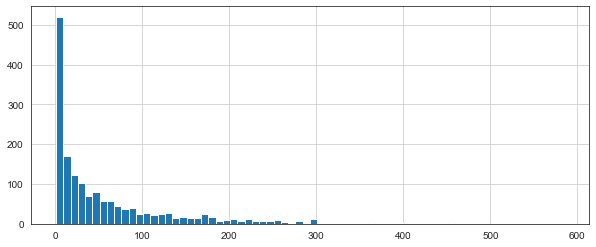

In [16]:
plt.figure(figsize = (10,4))
ratings['number_of_ratings'].hist(bins=70)

Next plot for ratings column.

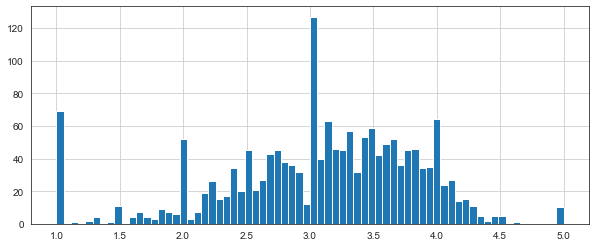

In [17]:
plt.figure(figsize = (10,4))
ratings['ratings'].hist(bins=70)

The above plot looklike a Gaussian curve following normal distribution. There are some outliers at both ends.

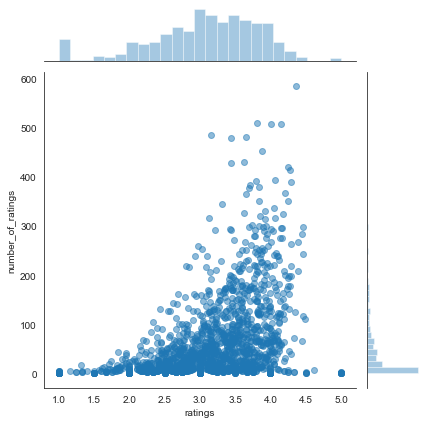

In [19]:
sns.jointplot(x='ratings', y='number_of_ratings', data=ratings, alpha=0.5)

The above figure shows the joint plot of ratings and number of ratings on both axes. Now we are going to create the recommendation system 

we are going to create a new table which includes columns as movie titles, rows as user_id and matches them with the corresponding ratings.

In [21]:
movie_mat = df.pivot_table(index='user_id', columns='title', values='ratings')
movie_mat.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above table show the ratings given by each user to the corresponding movie. NaN - user not rated that movie

Now find the highest rated movies

In [26]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,ratings,number_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Lets choose two movies 1.The Shawshank Redemption a feel good and The God Father a gangster movie.

In [32]:
sd_user_rating = movie_mat['Shawshank Redemption, The (1994)']
gf_user_rating = movie_mat['Godfather, The (1972)']
sd_user_rating.head()
gf_user_rating.head()

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
Name: Godfather, The (1972), dtype: float64

we can now use corrwith() funtion to find correlation between two pandas series. 

In [33]:
similiar_to_sd = movie_mat.corrwith(sd_user_rating)
similiar_to_gf = movie_mat.corrwith(gf_user_rating)

C:\Users\Manikandan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Manikandan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series

In [34]:
corr_sd = pd.DataFrame(similiar_to_sd, columns=['Correlation'])
corr_sd.dropna(inplace=True)
corr_sd.head(10)

,Correlation
title,
1-900 (1994),-1.000000
101 Dalmatians (1996),0.147740
12 Angry Men (1957),0.205231
187 (1997),0.739541
2 Days in the Valley (1996),0.306835
"20,000 Leagues Under the Sea (1954)",0.157078
2001: A Space Odyssey (1968),0.081426
"39 Steps, The (1935)",0.000000
8 1/2 (1963),-0.226276


The values we are getting between 0 to 1. Here a space odessy is the most similiar movie with 0.81 similiarity.

Now we can sort this data frame to get most similiar movies.

In [35]:
corr_sd.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
City of Industry (1997),1.0
"Ciao, Professore! (1993)",1.0
"Search for One-eye Jimmy, The (1996)",1.0
Curdled (1996),1.0
Daniel Defoe's Robinson Crusoe (1996),1.0
"Shawshank Redemption, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Fille seule, La (A Single Girl) (1995)",1.0
Anna (1996),1.0


Here we getting some of the movies with full correlation. But this won't make any sense. 
becase these can be seen only one time by a user who watched The Shawshank redemption.

Now, Lets Filter out the movies that has less than 100 reviews

In [36]:
corr_sd = corr_sd.join(ratings['number_of_ratings'])
corr_sd.head(10)

,Correlation,number_of_ratings
title,,
1-900 (1994),-1.000000,5
101 Dalmatians (1996),0.147740,109
12 Angry Men (1957),0.205231,125
187 (1997),0.739541,41
2 Days in the Valley (1996),0.306835,93
"20,000 Leagues Under the Sea (1954)",0.157078,72
2001: A Space Odyssey (1968),0.081426,259
"39 Steps, The (1935)",0.000000,59
8 1/2 (1963),-0.226276,38


Now sort the values and notice how the titles make a lot more sense

In [37]:
corr_sd[corr_sd['number_of_ratings']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
"Shawshank Redemption, The (1994)",1.000000,283
Happy Gilmore (1996),0.467091,149
Glory (1989),0.461662,171
Austin Powers: International Man of Mystery (1997),0.455807,130
"River Wild, The (1994)",0.445034,146
Beautiful Girls (1996),0.412295,115
"Frighteners, The (1996)",0.411245,115
Sleepers (1996),0.409790,169
Amistad (1997),0.406472,124


If you are 'Watched Shawshank Redemption' the next movie suggested will be 'Happy Gilmore'

Now repeat this for God Father

In [38]:
corr_gf = pd.DataFrame(similiar_to_gf, columns=['Correlation'])
corr_gf.dropna(inplace=True)
corr_gf.head(10)

,Correlation
title,
'Til There Was You (1997),0.612372
1-900 (1994),-0.471405
101 Dalmatians (1996),0.084183
12 Angry Men (1957),0.034258
187 (1997),0.467335
2 Days in the Valley (1996),0.229871
"20,000 Leagues Under the Sea (1954)",0.095229
2001: A Space Odyssey (1968),0.305717
"39 Steps, The (1935)",0.006306


In [39]:
corr_gf.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Dark City (1998),1.0
8 Seconds (1994),1.0
Talking About Sex (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Bye Bye, Love (1995)",1.0
"Locusts, The (1997)",1.0
Kicked in the Head (1997),1.0
"Outlaw, The (1943)",1.0
"Beans of Egypt, Maine, The (1994)",1.0


In [40]:
corr_gf = corr_gf.join(ratings['number_of_ratings'])
corr_gf.head(10)

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),0.612372,9
1-900 (1994),-0.471405,5
101 Dalmatians (1996),0.084183,109
12 Angry Men (1957),0.034258,125
187 (1997),0.467335,41
2 Days in the Valley (1996),0.229871,93
"20,000 Leagues Under the Sea (1954)",0.095229,72
2001: A Space Odyssey (1968),0.305717,259
"39 Steps, The (1935)",0.006306,59


In [43]:
corr_gf[corr_gf['number_of_ratings']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
"Godfather, The (1972)",1.000000,413
"Godfather: Part II, The (1974)",0.683862,209
GoodFellas (1990),0.421477,226
"People vs. Larry Flynt, The (1996)",0.393439,215
Bonnie and Clyde (1967),0.386226,122
Chinatown (1974),0.376133,147
Apocalypse Now (1979),0.374378,221
Some Like It Hot (1959),0.366085,128
Dead Man Walking (1995),0.360525,299


That's it. If you watched God Father Your next choice may be God Father II.
Like this we can get recommendations based on correlations. In this we found the correlation between user ratings and the movies.